In [25]:
import seaborn as sbn
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


titanicDataset = sbn.load_dataset("titanic")
df = titanicDataset.copy() #orjinal verisetini Bozup Daha Buyuk hatalarla karsilasmamak icin kopyaliyoruz.
df.head(8).T #Veri setini Daha Anlasilir gormek icin Transpozunu aliyorum ve ilk 8 Property gosteriyoruz


,0,1,2,3,4,5,6,7
survived,0,1,1,1,0,0,0,0
pclass,3,1,3,1,3,3,1,3
sex,male,female,female,female,male,male,male,male
age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0
sibsp,1,1,0,1,0,0,0,3
parch,0,0,0,0,0,0,0,1
fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075
embarked,S,C,S,S,S,Q,S,S
class,Third,First,Third,First,Third,Third,First,Third
who,man,woman,woman,woman,man,man,man,child


In [3]:
df.tail(5) #Son 5 Property

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
df.describe().T # Detayli Bilgiler (Count,mean,std....)

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.columns #Sutun isimlerini Yazdirma.

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
df.isnull().sum() #hangi degiskende kac tane eksik deger var gosteririr

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)# Once Eksik verileri siliyorum Inplacte True Olsa bile copy frame uzerinde islem yapiyoruz.
df.isnull().sum() #Kontrol Amacli Tekrar Print Ediyorum.

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [8]:
#String Donusumler Icin Label Encoder
_label = preprocessing.LabelEncoder() #preprocessing.LabelEncoder()

#Veri Seti Uzerinde Encode Edilebilecek Row'lar
sexEncode = _label.fit_transform(df["sex"])
whoEncode = _label.fit_transform(df["who"])
aliveEncode = _label.fit_transform(df["alive"])
passengerStatus = _label.fit_transform(df["class"])
passengerAdultMale = _label.fit_transform(df["adult_male"])
passengerAlone = _label.fit_transform(df["alone"])


print("Sex Encoded:",sexEncode)
print("Who Encoded:",whoEncode)
print("Alive Encoded:",aliveEncode)
print("Passenger Status Encoded:",passengerStatus)
print("Passenger Adult Male Encoded:",passengerAdultMale)
print("Alone Encoded:",passengerAlone)

Sex Encoded: [0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1]
Who Encoded: [2 2 1 0 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 2 0 0 2 2 0 1 2
 2 1 2 1 1 2 1 2 1 1 2 2 1 2 2 1 0 2 0 2 2 2 2 2 2 2 2 2 1 1 1 2 0 2 2 2 2
 2 1 1 1 2 2 2 1 1 1 0 1 0 1 1 1 1 1 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 1 2 2 1
 1 2 2 2 1 2 2 1 2 1 2 1 2 0 1 1 2 1 1 2 1 1 1 1 1 1 1 0 1 1 1 2 1 1 2 1 1
 2 2 1 2 1 1 2 1 1 0 2 2 2 2 2 2 1 1 2 0 1 2 2 2 2 2 1 2 1 2 1 2 2 1]
Alive Encoded: [1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 

In [9]:
df.alive #Veri Seti Oykusune gore yolcuların hangi parametrelere bagli olarak hayatta kalip kalmadigini arastirmak icin target olarak alive secildi.


1      yes
3      yes
6       no
10     yes
11     yes
      ... 
871    yes
872     no
879    yes
887    yes
889    yes
Name: alive, Length: 182, dtype: object

In [10]:
df.info()#Yapisal Bilgileri Gormek ve object turunu kategorize etmek icin on bilgilendirme

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [11]:
#Object turunde ve grafik haline getirmek istedigim oznitelikleri kategorik olarak duzenliyorum
df.alive = pd.Categorical(df.alive) 
df.sex = pd.Categorical(df.sex) 
df.who = pd.Categorical(df.who) 
 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    category
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    category
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    category
 14  alone        182 non-null    bool    
dtypes: bool(2), category(5), float64(2), int64(4), object(2)
memory usage: 14.9+ KB


alive
0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

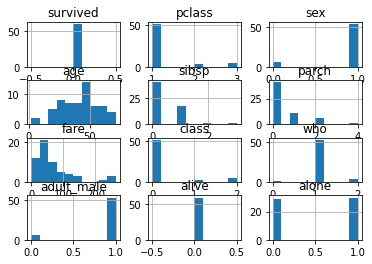

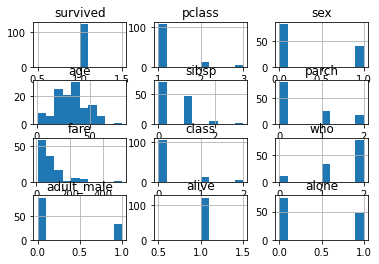

In [12]:
##Grupla ve Cizdir.
##Daha oncesinde encode ettigim verilerimi Frame icerisine aliyorum
#Manuel Inplace true diyebiliriz.
df.alive = aliveEncode
df.sex = sexEncode
df.adult_male = passengerAdultMale
df.who = whoEncode
df["class"] = passengerStatus 
df.alone = passengerAlone
##Target ozelligim olan alive'a gore grupluyor ve histogram grafigini yazdiriyorum.
groupFrame = df.groupby("alive")
groupFrame.hist()


In [13]:
#Siniflandirma Islemlerini Yapmak Icin x ve y olarak feature ayiriyorum.
x = df[["sex","who","adult_male","class","alone"]]
y = df.alive
print(x)
print(y)


     sex  who  adult_male  class  alone
1      0    2           0      0      0
3      0    2           0      0      0
6      1    1           1      0      1
10     0    0           0      2      0
11     0    2           0      0      1
..   ...  ...         ...    ...    ...
871    0    2           0      0      0
872    1    1           1      0      1
879    0    2           0      0      0
887    0    2           0      0      1
889    1    1           1      0      1

[182 rows x 5 columns]
1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: alive, Length: 182, dtype: int32


In [14]:
#train ve test olarak ayiriyorum ve %25 olarak test size aliyorum.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [24]:
#Bu Noktada Odevde Istenen 1)Karar Agaci,2)Bayes,3)K En yakin Komus, 4)SVM
#siniflandirma modellerini uygulamak adina Methodlara Ayiriyorum.
def kararAgaci(xTrain,yTrain,xTest,yTest):
    kararAgaci = DecisionTreeClassifier()
    kararAgaci = kararAgaci.fit(xTrain,yTrain)
    y_pred = kararAgaci.predict(xTest)
    print("Karar Agaci Basari(Accuracy):",metrics.accuracy_score(yTest,y_pred))
    print("Karar Agaci Basari(Confusion-Matrix):",confusion_matrix(yTest,y_pred))
    print("Karar Agaci Basari(Recall):",recall_score(yTest,y_pred))
    print("Karar Agaci Basari(Precision):",precision_score(yTest,y_pred))
    print("Karar Agaci Basari(F1-Score):",f1_score(yTest,y_pred))




def kNearest(xTrain,yTrain,xTest,yTest,neighNum):
    modelNeigh = KNeighborsClassifier(n_neighbors=neighNum)
    modelNeigh.fit(xTrain,yTrain)
    predictModel = modelNeigh.predict(xTest)
    print("K-En Yakin Komsu Basari(Accuracy):",metrics.accuracy_score(yTest,predictModel))
    print("K-En Yakin Komsu Basari(Confusion-Matrix):",confusion_matrix(yTest,predictModel))
    print("K-En Yakin Komsu Basari(Recall):",recall_score(yTest,predictModel))
    print("K-En Yakin Komsu Basari(Precision):",precision_score(yTest,predictModel))
    print("K-En Yakin Komsu Basari(F1-Score):",f1_score(yTest,predictModel))



def bayesMethod(xTrain,yTrain,xTest,yTest):
    gnb = GaussianNB()
    y_pred = gnb.fit(xTrain,yTrain).predict(xTest)
    print("(BAYES)Yanlis etiketlenen noktalarin Toplam sayisi %d Noktalar : %d"% (xTest.shape[0], (yTest != y_pred).sum()))
    print("Bayes Metod Basari(Accuracy):",metrics.accuracy_score(yTest,y_pred))
    print("Bayes Metod Basari(Confusion-Matrix):",confusion_matrix(yTest,y_pred))
    print("Bayes Metod Basari(Recall):",recall_score(yTest,y_pred))
    print("Bayes Metod Basari(Precision):",precision_score(yTest,y_pred))
    print("Bayes Metod Basari(F1-Score):",f1_score(yTest,y_pred))

def svmFucnc(xTrain,yTrain,xTest,yTest):
    clf = svm.SVC(kernel='linear')#Lineer Kernel
    clf.fit(xTrain,yTrain)
    y_pred = clf.predict(xTest)
    print("Destek Vektor Basarisi(Accuracy):",metrics.accuracy_score(yTest,y_pred))
    print("Destek Vektor Basarisi(Confusion-Matrix):",confusion_matrix(yTest,y_pred))
    print("Destek Vektor Basarisi(Recall):",recall_score(yTest,y_pred))
    print("Destek Vektor Basarisi(Precision):",precision_score(yTest,y_pred))
    print("Destek Vektor Basarisi(F1-Score):",f1_score(yTest,y_pred))




kNearest(x_train,y_train,x_test,y_test,7)
print("\n---------------SEPERATOR------------------\n")
kararAgaci(x_train,y_train,x_test,y_test)
print("\n---------------SEPERATOR------------------\n")
bayesMethod(x_train,y_train,x_test,y_test)
print("\n---------------SEPERATOR------------------\n")
svmFucnc(x_train,y_train,x_test,y_test)


K-En Yakin Komsu Basari(Accuracy): 0.8695652173913043
K-En Yakin Komsu Basari(Confusion-Matrix): [[ 8  3]
 [ 3 32]]
K-En Yakin Komsu Basari(Recall): 0.9142857142857143
K-En Yakin Komsu Basari(Precision): 0.9142857142857143
K-En Yakin Komsu Basari(F1-Score): 0.9142857142857143

---------------SEPERATOR------------------

Karar Agaci Basari(Accuracy): 0.7391304347826086
Karar Agaci Basari(Confusion-Matrix): [[11  0]
 [12 23]]
Karar Agaci Basari(Recall): 0.6571428571428571
Karar Agaci Basari(Precision): 1.0
Karar Agaci Basari(F1-Score): 0.7931034482758621

---------------SEPERATOR------------------

(BAYES)Yanlis etiketlenen noktalarin Toplam sayisi 46 Noktalar : 10
Bayes Metod Basari(Accuracy): 0.782608695652174
Bayes Metod Basari(Confusion-Matrix): [[11  0]
 [10 25]]
Bayes Metod Basari(Recall): 0.7142857142857143
Bayes Metod Basari(Precision): 1.0
Bayes Metod Basari(F1-Score): 0.8333333333333333

---------------SEPERATOR------------------

Destek Vektor Basarisi(Accuracy): 0.78260869565